In [23]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [24]:
np.random.seed(0)

In [25]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

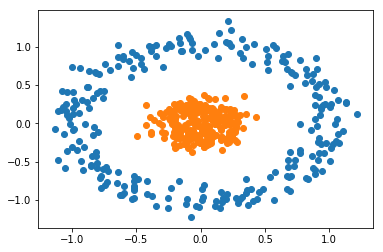

In [26]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [27]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid')) #Input already specified in the hidden layer
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'] )

In [28]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs = 100, shuffle='true' )

Epoch 1/100
500/500 [==============================] - 0s 951us/step - loss: 0.6959 - acc: 0.5100
Epoch 2/100
500/500 [==============================] - 0s 101us/step - loss: 0.6937 - acc: 0.6200
Epoch 3/100
500/500 [==============================] - 0s 98us/step - loss: 0.6925 - acc: 0.5140
Epoch 4/100
500/500 [==============================] - 0s 102us/step - loss: 0.6916 - acc: 0.6780
Epoch 5/100
500/500 [==============================] - 0s 106us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 96us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 100us/step - loss: 0.6865 - acc: 0.6460
Epoch 8/100
500/500 [==============================] - 0s 98us/step - loss: 0.6838 - acc: 0.6740
Epoch 9/100
500/500 [==============================] - 0s 121us/step - loss: 0.6796 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 98us/step - loss: 0.6734 - acc: 0.7980
Epoch 11/100
500/500 [=

Text(0.5, 1.0, 'accuracy')

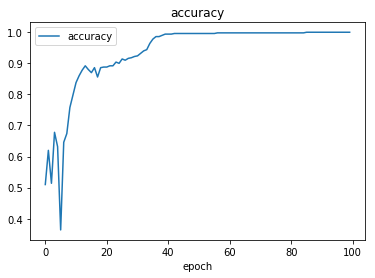

In [30]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

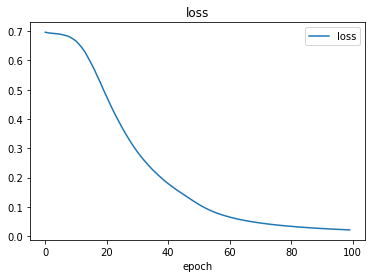

In [31]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [32]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

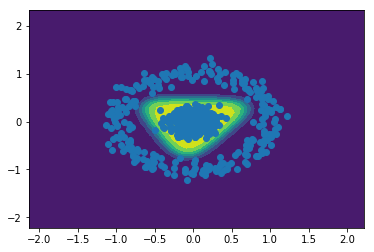

In [33]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is  [[0.02547223]]


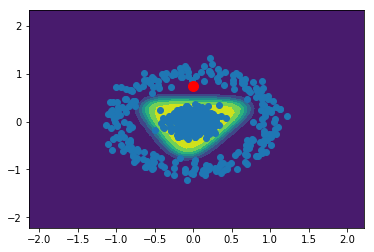

In [39]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x=0
y=0.75
point=np.array([[x,y]])
prediction=model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("prediction is ", prediction)